In [4]:
# 导入相关包
import os
import random
import numpy as np
from Maze import Maze
from Runner import Runner
from QRobot import QRobot
from ReplayDataSet import ReplayDataSet
import matplotlib.pyplot as plt


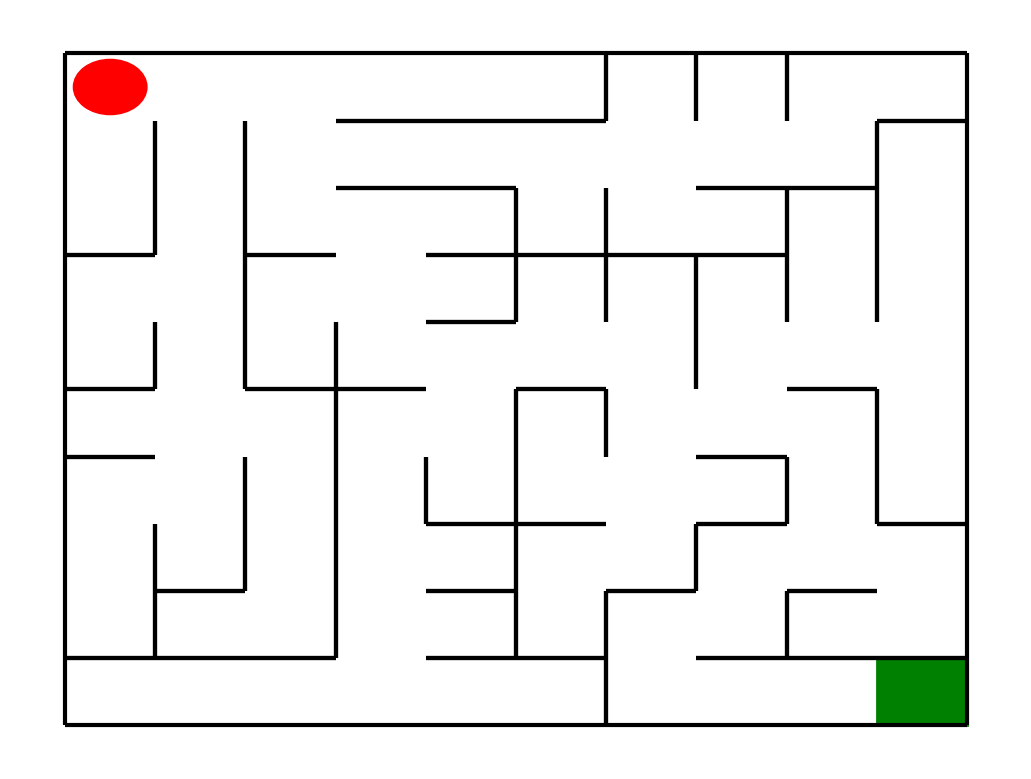

Maze of size (10, 10)


In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

""" 创建迷宫并展示 """
maze = Maze(maze_size=10) # 随机生成迷宫
print(maze)


In [6]:
import numpy as np

# 机器人移动方向
move_map = {
    'u': (-1, 0), # up
    'r': (0, +1), # right
    'd': (+1, 0), # down
    'l': (0, -1), # left
}


# 迷宫路径搜索树
class SearchTree(object):


    def __init__(self, loc=(), action='', parent=None):
        """
        初始化搜索树节点对象
        :param loc: 新节点的机器人所处位置
        :param action: 新节点的对应的移动方向
        :param parent: 新节点的父辈节点
        """

        self.loc = loc  # 当前节点位置
        self.to_this_action = action  # 到达当前节点的动作
        self.parent = parent  # 当前节点的父节点
        self.children = []  # 当前节点的子节点

    def add_child(self, child):
        """
        添加子节点
        :param child:待添加的子节点
        """
        self.children.append(child)

    def is_leaf(self):
        """
        判断当前节点是否是叶子节点
        """
        return len(self.children) == 0


def expand(maze, is_visit_m, node):
    """
    拓展叶子节点，即为当前的叶子节点添加执行合法动作后到达的子节点
    :param maze: 迷宫对象
    :param is_visit_m: 记录迷宫每个位置是否访问的矩阵
    :param node: 待拓展的叶子节点
    """
    can_move = maze.can_move_actions(node.loc)
    for a in can_move:
        new_loc = tuple(node.loc[i] + move_map[a][i] for i in range(2))
        if not is_visit_m[new_loc]:
            child = SearchTree(loc=new_loc, action=a, parent=node)
            node.add_child(child)


def back_propagation(node):
    """
    回溯并记录节点路径
    :param node: 待回溯节点
    :return: 回溯路径
    """
    path = []
    while node.parent is not None:
        path.insert(0, node.to_this_action)
        node = node.parent
    return path


def breadth_first_search(maze):
    """
    对迷宫进行广度优先搜索
    :param maze: 待搜索的maze对象
    """
    start = maze.sense_robot()
    root = SearchTree(loc=start)
    queue = [root]  # 节点队列，用于层次遍历
    h, w, _ = maze.maze_data.shape
    is_visit_m = np.zeros((h, w), dtype=np.int32)  # 标记迷宫的各个位置是否被访问过
    path = []  # 记录路径
    while True:
        current_node = queue[0]
        is_visit_m[current_node.loc] = 1  # 标记当前节点位置已访问

        if current_node.loc == maze.destination:  # 到达目标点
            path = back_propagation(current_node)
            break

        if current_node.is_leaf():
            expand(maze, is_visit_m, current_node)

        # 子节点入队，BFS核心
        for child in current_node.children:
            queue.append(child)
        # 本节点出队，BFS核心
        queue.pop(0)

    return path


**测试广度优先搜索算法**

搜索出的路径： ['r', 'r', 'r', 'd', 'r', 'd', 'r', 'd', 'r', 'd', 'd', 'd', 'd', 'r', 'd', 'r', 'r', 'd']
恭喜你，到达了目标点
Maze of size (10, 10)


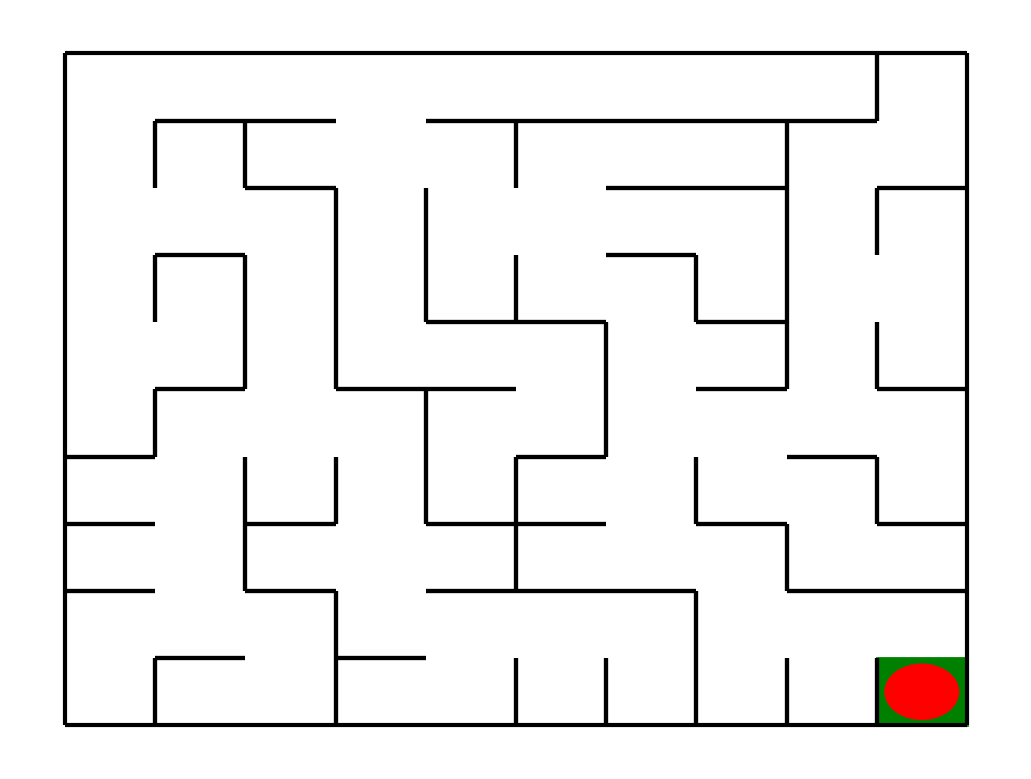

In [7]:
maze = Maze(maze_size=10)
height, width, _ = maze.maze_data.shape

path_1 = breadth_first_search(maze)
print("搜索出的路径：", path_1)

for action in path_1:
    maze.move_robot(action)

if maze.sense_robot() == maze.destination:
    print("恭喜你，到达了目标点")

print(maze)

### 2.3.1 编写您的基础搜索算法

In [8]:
def my_search(maze):
    """
    任选深度优先搜索算法、最佳优先搜索（A*)算法实现其中一种
    :param maze: 迷宫对象
    :return :到达目标点的路径 如：["u","u","r",...]
    """
    # 本次实现的是深度优先搜索算法
    path = []

    # -----------------请实现你的算法代码--------------------------------------
    start = maze.sense_robot()
    root = SearchTree(loc=start)
    stack = [root]  # 节点栈，用于深度优先遍历
    h, w, _ = maze.maze_data.shape
    is_visit_m = np.zeros((h, w), dtype=np.int32)  # 标记迷宫的各个位置是否被访问过
    path = []  # 记录路径

    while stack:
        current_node = stack.pop()         # 当前节点出栈，DFS核心
        is_visit_m[current_node.loc] = 1  # 标记当前节点位置已访问

        # 如果当前节点是目标点，回溯路径
        if current_node.loc == maze.destination:
            path = back_propagation(current_node)
            break

        # 如果当前节点是叶子节点，则拓展其子节点
        if current_node.is_leaf():
            expand(maze, is_visit_m, current_node)

        # 将所有未被访问过的子节点压入栈中，DFS的核心
        for child in reversed(current_node.children):  # 反向压栈，以便保持深度优先的顺序
            if not is_visit_m[child.loc]:
                stack.append(child)

    # -----------------------------------------------------------------------
    return path


### 2.3.2 测试您编写的基础搜索算法

搜索出的路径： ['r', 'r', 'd', 'l', 'd', 'r', 'd', 'r', 'r', 'r', 'r', 'd', 'r', 'r', 'd', 'd', 'd', 'd', 'l', 'l', 'd', 'r', 'r', 'r']
恭喜你，到达了目标点
Maze of size (10, 10)


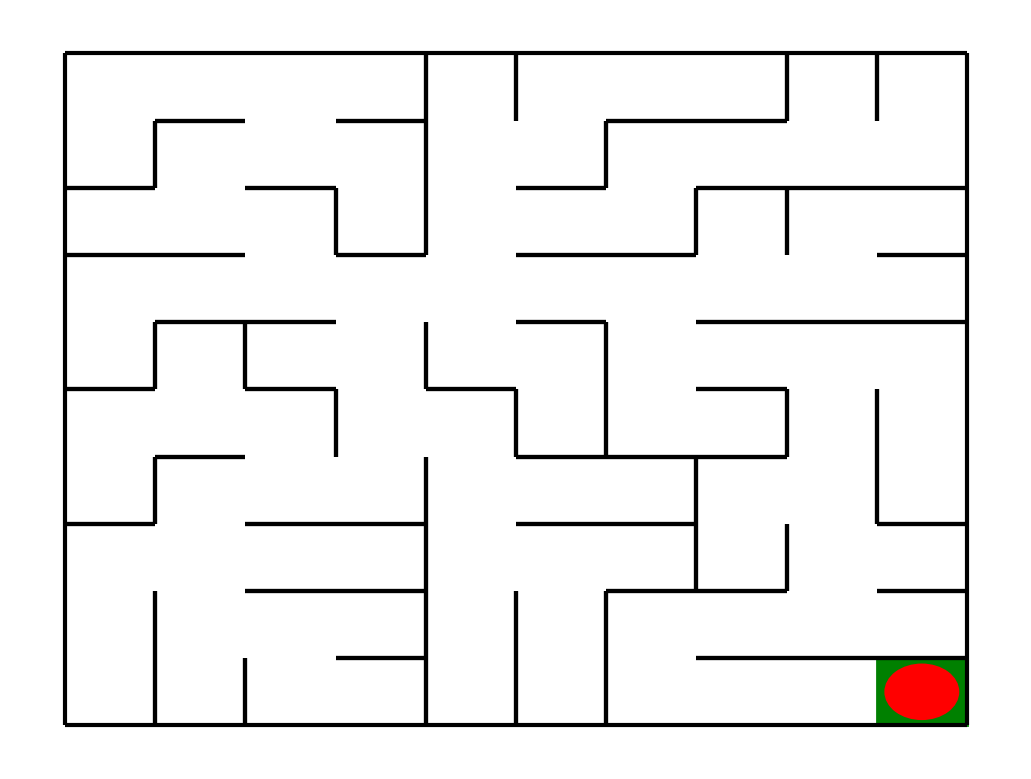

In [9]:
maze = Maze(maze_size=10) # 从文件生成迷宫

path_2 = my_search(maze)
print("搜索出的路径：", path_2)

for action in path_2:
    maze.move_robot(action)


if maze.sense_robot() == maze.destination:
    print("恭喜你，到达了目标点")
print(maze)


In [10]:
from QRobot import QRobot
from torch import nn
import torch.optim as optim
import torch
import collections
import copy

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class ReplayBuffer:
    ''' 经验回放池 '''
    def __init__(self, capacity):
        self.buffer = collections.deque(maxlen=capacity)  # 队列,先进先出

    def add(self, state, action, reward, next_state, done):  # 将数据加入buffer
        self.buffer.append((state, action, reward, next_state, done))

    def sample(self, batch_size):       # 从buffer中采样数据，数量为batch_size
        transitions = random.sample(self.buffer, batch_size)
        state, action, reward, next_state, done = zip(*transitions)
        return np.array(state), action, reward, np.array(next_state), done

    def size(self):  # 目前buffer中数据的数量
        return len(self.buffer)

    def build_full_view(self, maze: Maze):      # 获取视野
        maze_copy = copy.deepcopy(maze)
        maze_size = maze_copy.maze_size
        actions = ["u", "r", "d", "l"]
        for i in range(maze_size):
            for j in range(maze_size):
                state = (i, j)
                if state == maze_copy.destination:
                    continue
                for action_index, action in enumerate(actions):
                    maze_copy.robot["loc"] = state
                    reward = maze_copy.move_robot(action)
                    next_state = maze_copy.sense_robot()
                    is_terminal = 1 if next_state == maze_copy.destination or next_state == state else 0
                    self.add(state, action_index, reward, next_state, is_terminal)


class DQN(nn.Module):
    ''' 定义Q网络 '''
    def __init__(self, state_size, action_size):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(state_size, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, action_size)
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)


class Robot(QRobot):
    ''' 定义智能体 '''
    def __init__(self, maze):
        super(Robot, self).__init__(maze)
        maze.set_reward(reward={        # 回报规则
            "hit_wall": -5.0,
            "destination": maze.maze_size ** 2.0,
            "default": -1.0,
        })
        self.maze = maze
        self.gamma = 0.90                       # 折扣因子
        self.learning_rate = 0.001              # 学习率
        self.epsilon = 0                        # 探索率
        self.epsilon_decay = 0.9995             # 探索率衰减率
        self.epsilon_min = 0                    # 最小探索率
        self.replaybuffer = ReplayBuffer(2000)  # 经验回放池
        self.model = DQN(2, 4).to(device)       # Q网络
        self.target_model = DQN(2, 4).to(device)    # 目标网络
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)
        self.criterion = nn.MSELoss()
        self.count = 0
        self.action_dict = {"u":0, "r":1, "d":2, "l":3}     # 动作字典
        self.action_dict2 = {v: k for k, v in self.action_dict.items()}     # 反转字典

        self.replaybuffer.build_full_view(maze=maze)        # 开视野
        self.train()            # 训练

    def learn(self, batch_size=32):         # 更新网络
        if self.replaybuffer.size() < batch_size:
            return
        # 从经验池抽样s,a,r,s’,done
        b_s, b_a, b_r, b_ns, b_d = self.replaybuffer.sample(batch_size)
        transition_dict = {'states': b_s, 'actions': b_a, 'next_states': b_ns,
            'rewards': b_r, 'dones': b_d}
        states = torch.tensor(transition_dict['states'],
                              dtype=torch.float).to(device)
        actions = torch.tensor(transition_dict['actions']).view(-1, 1).to(device)
        rewards = torch.tensor(transition_dict['rewards'],
                               dtype=torch.float).view(-1, 1).to(device)
        next_states = torch.tensor(transition_dict['next_states'],
                                   dtype=torch.float).to(device)
        dones = torch.tensor(transition_dict['dones'],
                             dtype=torch.float).view(-1, 1).to(device)

        self.model.train()
        self.target_model.eval()
        # 计算Q值及其目标值
        Q_targets = rewards + self.gamma * self.target_model(next_states).reshape(batch_size, 4).max(1)[0].view(-1, 1) * (1-dones)
        Q_expect = self.model(states).reshape(batch_size, 4).gather(1, actions.to(torch.int64))
        # 求损失
        self.optimizer.zero_grad()  # 梯度清零
        loss = self.criterion(Q_expect, Q_targets)  # 损失
        loss.backward()             # 反向传播
        self.optimizer.step()       # 更新Q网络参数

        # if self.count % 10 == 0:
        self.target_model.load_state_dict(self.model.state_dict())  # 目标网络参数更新
            # self.count += 1

    def take_action(self, state):       # epsilon-贪心策略获取动作
        if random.uniform(0, 1) < self.epsilon:        # 随机选择动作
            # action = random.choice(self.maze.can_move_actions(self.maze.sense_robot()))
            action = random.choice(['u','r','d','l'])
        else:                                          # 选择具有最高Q值的动作
            self.model.eval()
            with torch.no_grad():
                q_values = self.model(state.to(device))
            action = self.action_dict2.get(torch.argmax(q_values).item())
            self.model.train()
        return action

    def train(self):        # 训练函数
        while True:
            self.learn(self.replaybuffer.size())
            self.reset()
            for _ in range(self.maze.maze_size ** 2 - 1):
                a, r = self.test_update()
                if r == self.maze.reward["destination"]:
                    return

    def train2(self):
        for i in range(10):     # episode（轨迹数）
            self.reset()
            done = False
            while not done:
                state = torch.tensor(self.maze.sense_robot(), dtype=torch.float32)  # 当前位置
                action = self.take_action(state)            # 选择动作
                reward = self.maze.move_robot(action)       # 执行动作并获取奖励
                next_state = torch.tensor(self.maze.sense_robot(), dtype=torch.float32)  # 新位置
                done = 1 if tuple(next_state.to(torch.int).tolist()) == self.maze.destination else 0    # 判断是否到终点
                self.replaybuffer.add(state, self.action_dict[action], reward, next_state, done)    # 五元组存入经验池
                if self.replaybuffer.size() > 32:
                    self.learn(batch_size=32)               # 更新网络参数
                if self.epsilon > self.epsilon_min:
                    self.epsilon *= self.epsilon_decay      # epsilon衰减


    def train_update(self):
        """
        以训练状态选择动作并更新Deep Q network的相关参数
        :return :action, reward 如："u", -1
        """
        # -----------------请实现你的算法代码--------------------------------------
        state = torch.tensor(self.maze.sense_robot(), dtype=torch.float32)
        action = self.take_action(state)
        reward = self.maze.move_robot(action)
        # -----------------------------------------------------------------------
        return action, reward

    def test_update(self):
        """
        以测试状态选择动作并更新Deep Q network的相关参数
        :return : action, reward 如："u", -1
        """
        # -----------------请实现你的算法代码--------------------------------------
        state = torch.tensor(self.maze.sense_robot(), dtype=torch.float32)
        self.model.eval()
        with torch.no_grad():
            q_values = self.model(state.to(device))
        action = self.action_dict2.get(torch.argmax(q_values).item())
        reward = self.maze.move_robot(action)
        # -----------------------------------------------------------------------

        return action, reward


#### （3）测试您的 DQN 算法


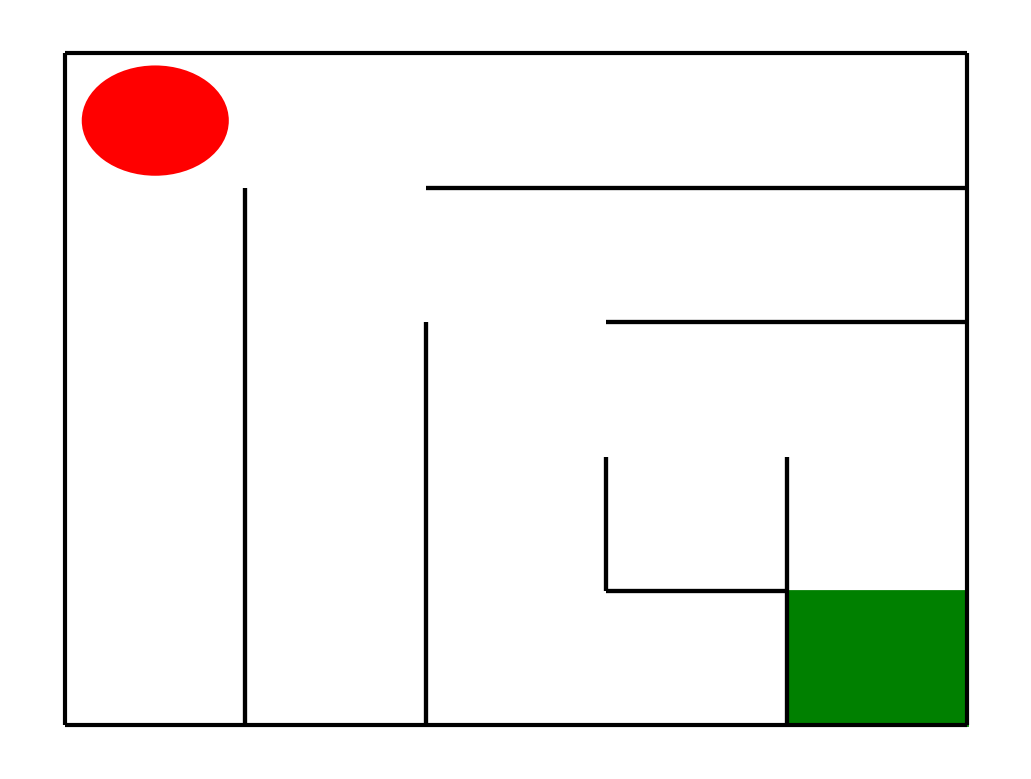

Maze of size (5, 5)


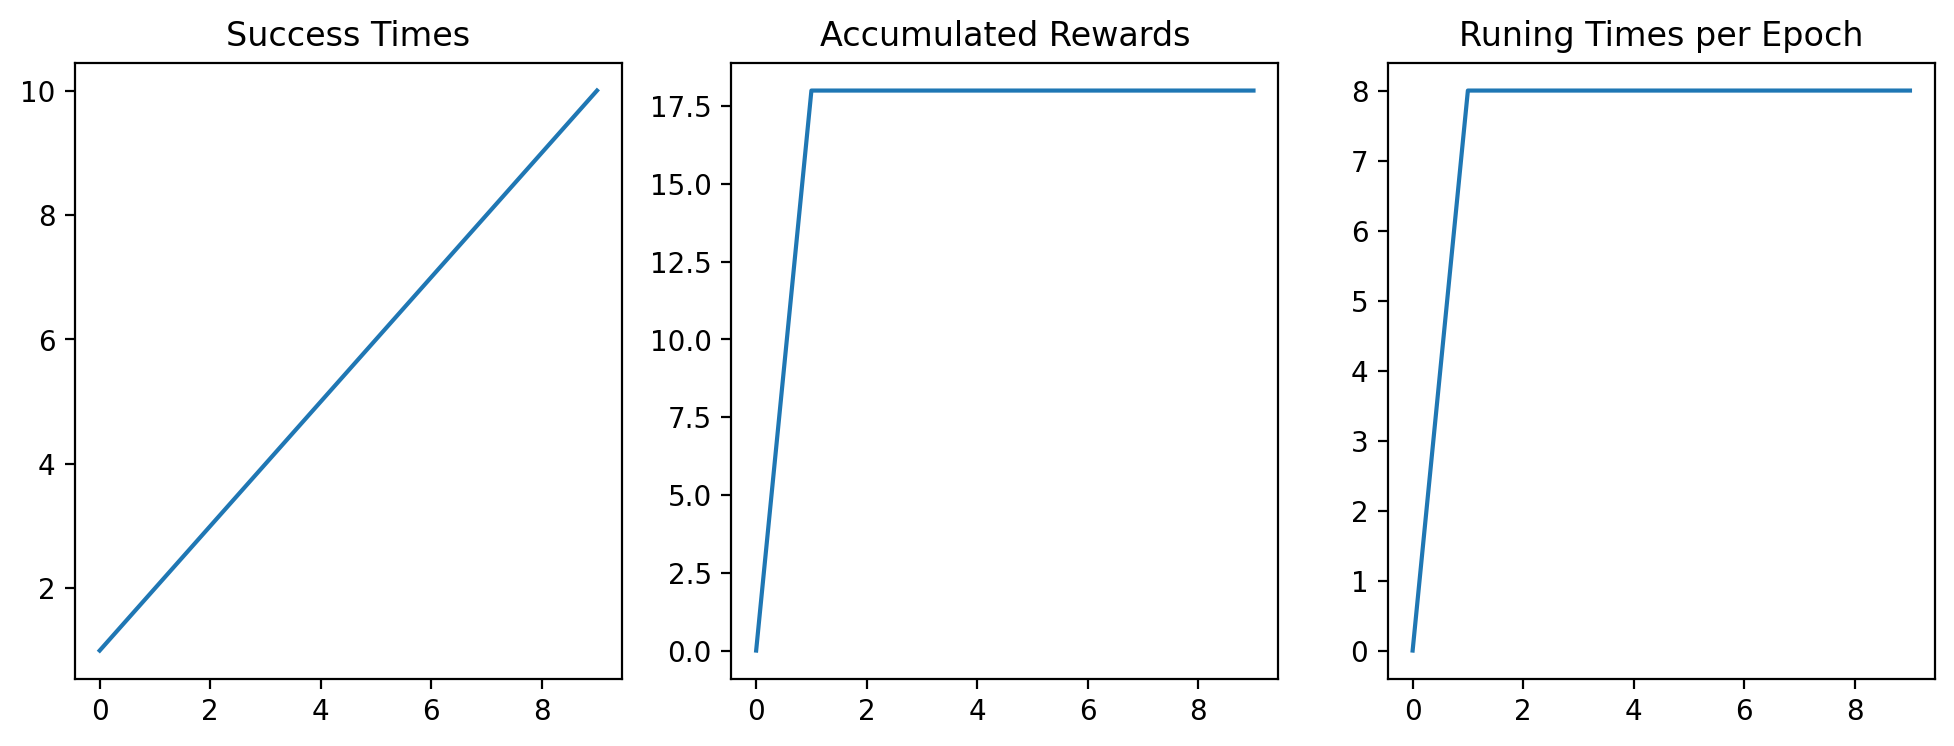

In [11]:
from QRobot import QRobot
from Maze import Maze
from Runner import Runner

random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
"""  Deep Qlearning 算法相关参数： """

epoch = 10  # 训练轮数
maze_size = 5  # 迷宫size
training_per_epoch = 50

""" 使用 DQN 算法训练 """

g = Maze(maze_size=maze_size)
print(g)
r = Robot(g)
runner = Runner(r)
runner.run_training(epoch, training_per_epoch)
# runner.run_testing()
runner.plot_results()
r.reset()
for _ in range(25):
    a, re = r.test_update()
    if re == maze.reward["destination"]:
        print("success")
        break


In [243]:
# 生成训练过程的gif图, 建议下载到本地查看；也可以注释该行代码，加快运行速度。
runner.generate_gif(filename=f"results/dqn_size{maze_size}.gif")


正在将训练过程转换为gif图, 请耐心等候...:   0%|          | 0/82 [00:00<?, ?it/s]

### 2.6.3 作业测试与提交

- 经过 `2.3` 与 `2.6` 分别测试使用基础算法、DQN算法实现机器人走出迷宫！
- 测试完成之后，点击左侧 `提交作业` 的标签中，把整个 Notebook 目标 cell 转化为 main.py 文件进行`系统测试`。
- 平台测试时请记得勾选 main.py 文件需要依赖的其它文件等。
- 通过测试就可以**提交作业**。
-  提交作业时请记得提交勾选 **『程序报告.docx』**或者 **『程序报告.pdf』**。

作业评分说明：
1. 满分100分，基础算法通过迷宫得 40 分， DQN 算法通过初级、中级、高级迷宫分别得 20 分。

**最后，祝愿您不仅能从中收获到满满的知识，而且收获到一个满意分数！**